# Video Game Sales Project

#### 1a) What is the problem to be solved?
- I want to figure out which publishers make the most revenue per game published.

#### 1b) Where is the information from?
- The information is from a csv file called Global Video Game Sales in Millions (from the Canvas page of Sample Information Sources and Domains)

#### 1c) Why is it interesting to the me?
- I play video games all the time to entertain myself, espcially when I am supposed to be studying.

#### 2a) What design choices did I have to make?
- I used compound, list, and arbitary-sized for the data definitions. I also used 4 helper functions, which are connected with the main function.

#### 2b) Why did I make these choices?
- I needed to create two data definitions. One for a video game and one for an arbitrary number of video games. 
- I used compound for the first data definition because the columns on the graph were information that belonged together. In my project, for each video game there is a publisher and global sales in millions.
- I then used list and arbitary-sized for the remainder of my data definitions. Since there are an arbitrary number of video games, we need to be able to store information about an arbitrary number of video games as data in our program.
- Next, I needed 4 helper functions because in order to produce the graph, I needed to divide the problem into 4 individual steps that build on each other (one task per function). These functions are part of the main function which is then called at the end to execute one task at a time to display the image.

In [ ]:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as plt
##################
# Data Definitions

VideoGame = NamedTuple('VideoGame', [('publisher', str),
                                     ('global_sales', float)])  # in millions, in range[0, ...)

# interp. a video game with the name of its publisher and the amount of global sales 

VG1 = VideoGame('Nintendo', 82.74)
VG2 = VideoGame('Nintendo', 40.24)
VG3 = VideoGame('Nintendo', 35.82)
VG4 = VideoGame('Microsoft Game Studios', 21.82)
VG5 = VideoGame('Activision', 14.64)
VG6 = VideoGame('Take-Two Interactive', 21.4)
VG7 = VideoGame('505 Games', 3.61)
VG8 = VideoGame('Sega', 8.06)
VG9 = VideoGame('Capcom', 6.3)
VG10 = VideoGame('GT Interactive', 6.27)


# template based on Compound
@typecheck
def fn_for_video_game(vg: VideoGame) -> ...:
    return ...(vg.publisher,
               vg.global_sales)

# List[VideoGame]
# interp. a list of video games

LOVG0 = []
LOVG1 = [VG1, VG2, VG3, VG4, VG5, VG6, VG7, VG8, VG9, VG10]

# template based on arbitary-sized and reference rule
@typecheck
def fn_for_lovg(lovg: List[VideoGame]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for vg in lovg:
        ...(fn_for_video_game(vg), acc)
    
    return acc

#### 3) Description of how I solved the problem, along with visuals that my program created.
- After completing my read function, I divided the problem into 4 steps. I needed to filter each publisher from the list of read, calculate the average sales per game for each publisher, produce a list of calculated averages, and then create a function that graphs the list of calculated averages. For each of these steps, I created helper functions, as seen below. Finally, I have my main function that calls the bar graph function to display the plotted bar graph.

### Helper Function 1: filter each publisher from the list of read

In [ ]:
def filter_publisher(vg: VideoGame, publisher: str) -> bool:
    """
    filter by each publisher in the list from read
    """
    # return True # stub
    # template based on VideoGame, with additional parameter string
    return vg.publisher == publisher

start_testing()

# examples and tests for filter_publisher
expect(filter_publisher(VG1, 'Nintendo'), True)
expect(filter_publisher(VG2, 'Capcom'), False)

summary()

### Helper Function 2: calculate the average sales per game for each publisher

In [ ]:
def calc_avg_per_publisher(lovg: List[VideoGame], publisher: str) -> float:
    """
    calculate the average sales per game for each publisher
    """
    # return 0.0 #stub
    # template based on List[VideoGame], with addtional parameter string
    # two accumulators, sum and tally
    # sum stores the total amount of sales for video games 
    # tally stores the number of games per publisher so far
    sum = 0.0   # type: float
    tally = 0   # type: int 
    for vg in lovg:
        if filter_publisher(vg, publisher):
            sum = sum + vg.global_sales
            tally = tally + 1
    if len(lovg) == 0:
        return 0
    else:
        return sum/tally

start_testing()

# examples and tests for calculate_average_per_publisher
expect(calc_avg_per_publisher([], ''), 0)
expect(calc_avg_per_publisher([VG1], "Nintendo"), 82.74)
expect(calc_avg_per_publisher([VG1, VG3], "Nintendo"), 59.28)

summary()

### Helper Function 3: produce a list of calculated averages

In [ ]:
def list_of_averages(lovg: List[VideoGame], publisher1: str, publisher2: str, publisher3: str, publisher4: str, publisher5: str) -> List[float]:
    # return [] #stub
    # template based on List[VideoGame] with 5 addtional string parameters
    """
    produces a list of calculated averages
    """
    avg1 = calc_avg_per_publisher(lovg, publisher1)
    avg2 = calc_avg_per_publisher(lovg, publisher2)
    avg3 = calc_avg_per_publisher(lovg, publisher3)
    avg4 = calc_avg_per_publisher(lovg, publisher4)
    avg5 = calc_avg_per_publisher(lovg, publisher5)
    return [avg1, avg2, avg3, avg4, avg5]
    
start_testing()

# examples and tests for list_of_averages
expect(list_of_averages([], '', '', '', '', ''), [0, 0, 0, 0, 0])
expect(list_of_averages([VG8, VG7, VG9, VG10, VG6], 'Sega', '505 Games', 'Capcom', 'GT Interactive', 'Take-Two Interactive'), [8.06, 3.61, 6.3, 6.27, 21.4])

summary()

### Helper Function 4: create a function that graphs the list of calculated averages

In [ ]:
def bar_graph(lof: List[float], publisher1: str, publisher2: str, publisher3: str, publisher4: str, publisher5: str) -> None:
    # return None #stub
    # template based on List[float] with five additional string parameters
    """
    creates a function that graphs the list of calculated averages
    """
    x_values = [publisher1, publisher2, publisher3, publisher4, publisher5]
    y_values = lof
    bar_width = 0.8
    plt.bar(x_values, y_values, bar_width, color='lightseagreen')
    plt.xlabel('Publisher')
    plt.ylabel('Average Sales per Game (in millions)')
    plt.title("Average Sales per Game for Certain Publishers")
    plt.xticks(rotation=45)
    plt.show
    return None

start_testing()

# examples and tests for bar_graph
expect(bar_graph([0.29, 2.54, 1.3, 0.75, 0.97],'505 Games', 'Nintendo', 'Microsoft Game Studios', 'Activision', 'Take-Two Interactive'), None)


summary()

### Graph produced

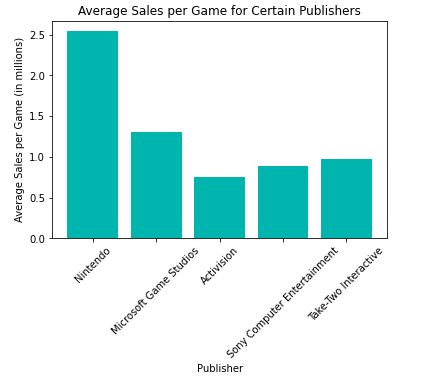